# Banana Quality 🍌

Tabular dataset contains numerical information about bananas of different quality (size, weight, sweetness, softness, harvest time, ripeness, acidity, quality).

**Columns**
* Size - size of fruit
* Weight - weight of fruit
* Sweetness - sweetness of fruit
* Softness - softness of fruit
* HarvestTime - amount of time passed from harvesting of the fruit
* Ripeness - ripness of fruit
* Acidity - acidity of fruit
* Quality - quality of fruit ('Good': 0, 'Bad': 1)

In [36]:
# Import all the tools we need

# Regular EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Lead Data

In [2]:
df = pd.read_csv("../data/banana_quality.csv")
df.shape

(8000, 8)

## Data Exploration (exploratory data analysis or EDA)

In [3]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [4]:
df["Quality"].value_counts()

Quality
Good    4006
Bad     3994
Name: count, dtype: int64

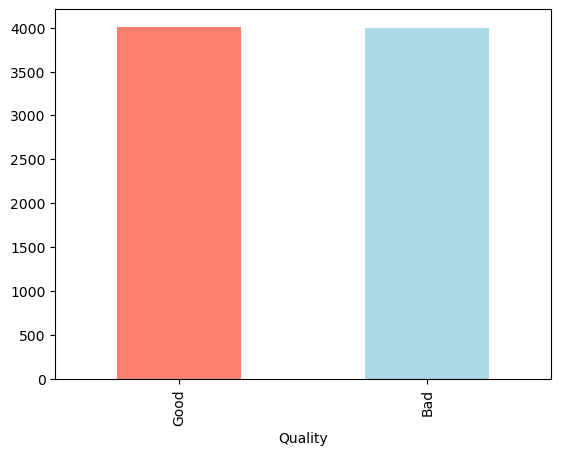

In [5]:
df["Quality"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [9]:
replace_dict = {'Good': 1, 'Bad': 0}

# Replace the values in the 'quantity' column
df['Quality'] = df['Quality'].replace(replace_dict)

In [10]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


Quality
1    4006
0    3994
Name: count, dtype: int64


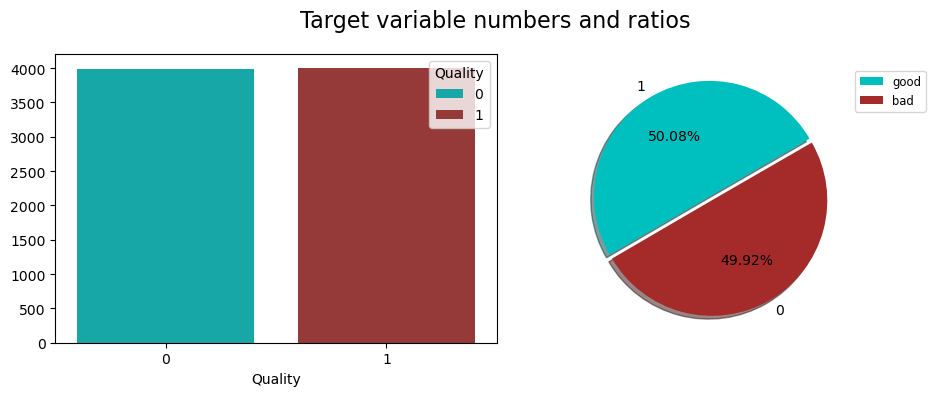

In [35]:
plt.figure(figsize=(10,4))
cols = ["c", "brown"]
plt.subplot(1,2,1)
sns.barplot(x=df["Quality"].value_counts().index, y=df["Quality"].value_counts(), palette=cols, hue=df["Quality"].value_counts().index)
plt.ylabel("")
plt.subplot(1,2,2)
plt.pie(x=df["Quality"].value_counts(), labels=df["Quality"].value_counts().index, shadow=True,
        explode=[0.02, 0.02], startangle=30, autopct='%0.2f%%', colors=cols)
plt.legend(labels=["good", "bad"], loc=(1,0.8), fontsize="small")
plt.suptitle("Target variable numbers and ratios", fontsize=16)
plt.tight_layout()
print(df.Quality.value_counts())
plt.show()

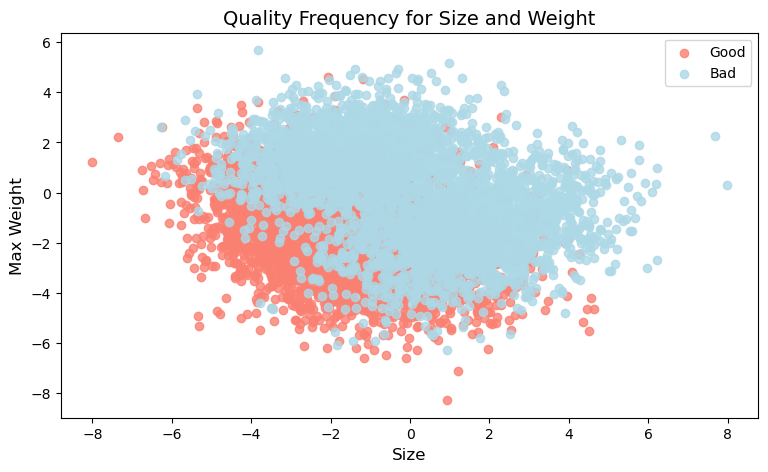

In [11]:
fig, ax = plt.subplots(figsize=(9, 5))

colors = ["salmon", "lightblue"]
labels = ["Good", "Bad"]

for quality, color, label in zip([0, 1], colors, labels):
    quality_data = df[df["Quality"] == quality]
    
    ax.scatter(quality_data["Size"], quality_data["Weight"], c=color, label=label, alpha=0.8)

ax.set_title("Quality Frequency for Size and Weight", fontsize=14)
ax.set_xlabel("Size", fontsize=12)
ax.set_ylabel("Max Weight", fontsize=12)

ax.legend()

plt.show()

In [12]:
df.corr()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
Size,1.000000,-0.181933,-0.258027,0.164526,0.582014,0.042587,-0.140673,0.352983
Weight,-0.181933,1.000000,0.422683,-0.189908,-0.079465,-0.035276,0.443879,0.388789
Sweetness,-0.258027,0.422683,1.000000,-0.095338,-0.201657,0.180095,0.187059,0.377220
Softness,0.164526,-0.189908,-0.095338,1.000000,0.194734,-0.253804,-0.146014,-0.001637
HarvestTime,0.582014,-0.079465,-0.201657,0.194734,1.000000,0.107127,-0.090903,0.376600
Ripeness,0.042587,-0.035276,0.180095,-0.253804,0.107127,1.000000,-0.351531,0.350503
Acidity,-0.140673,0.443879,0.187059,-0.146014,-0.090903,-0.351531,1.000000,-0.000860
Quality,0.352983,0.388789,0.377220,-0.001637,0.376600,0.350503,-0.000860,1.000000


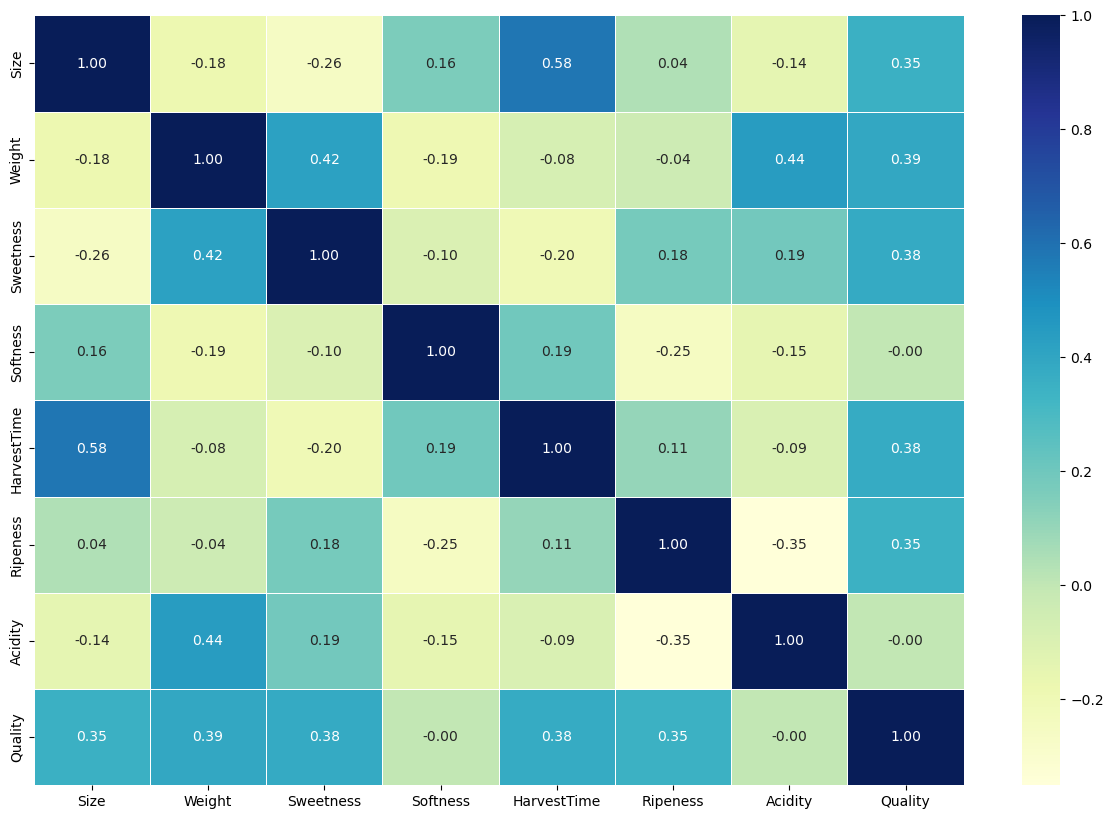

In [13]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Modeling

In [14]:
np.random.seed(42)

X = df.drop("Quality", axis=1)
y = df["Quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [16]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.980625, 'Logistic Regression': 0.879375, 'Random Forest': 0.975}

## Model Comparison

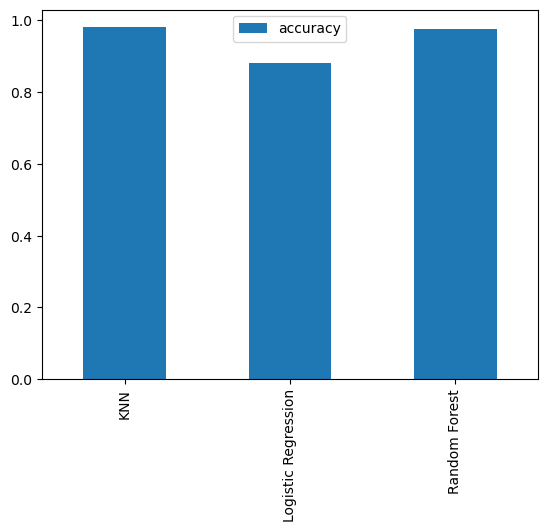

In [17]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [18]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 98.06%


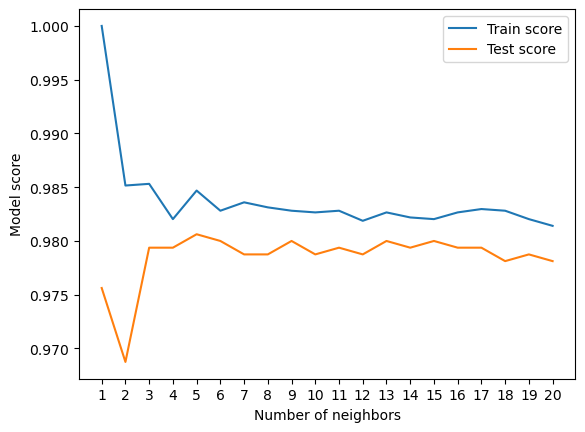

In [19]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [20]:
# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [21]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [22]:
rs_rf.score(X_test, y_test)

0.975625

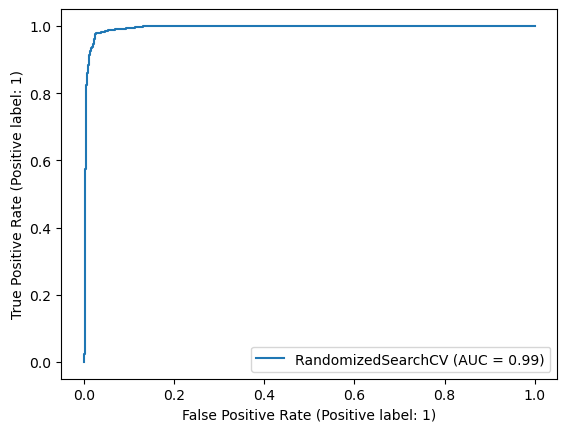

In [23]:
RocCurveDisplay.from_estimator(estimator=rs_rf, 
                               X=X_test, 
                               y=y_test); 

## Evaluating a classification model, beyond accuracy


In [24]:
# Make preidctions on test data
y_preds = rs_rf.predict(X_test)

In [25]:
print(confusion_matrix(y_test, y_preds))

[[760  21]
 [ 18 801]]


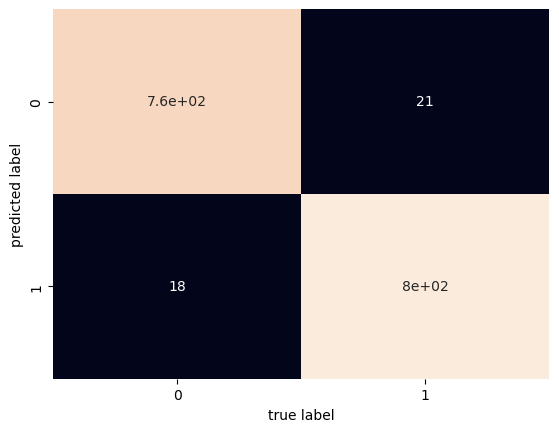

In [26]:
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots()
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [27]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       781
           1       0.97      0.98      0.98       819

    accuracy                           0.98      1600
   macro avg       0.98      0.98      0.98      1600
weighted avg       0.98      0.98      0.98      1600



In [28]:
best_params = rs_rf.best_params_
best_params

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [29]:
clf = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                            min_samples_split=best_params['min_samples_split'],
                            min_samples_leaf=best_params['min_samples_leaf'],
                            max_depth=best_params['max_depth'])

In [30]:
clf.fit(X_train, y_train);

In [31]:
clf.feature_importances_

array([0.15655913, 0.16948138, 0.16059398, 0.14134193, 0.1522757 ,
       0.14237732, 0.07737056])

In [32]:
features_dict = dict(zip(df.columns, list(clf.feature_importances_)))
features_dict

{'Size': 0.15655912798757454,
 'Weight': 0.16948138310576336,
 'Sweetness': 0.1605939753741567,
 'Softness': 0.1413419314699783,
 'HarvestTime': 0.15227569579967917,
 'Ripeness': 0.14237732267336956,
 'Acidity': 0.07737056358947841}

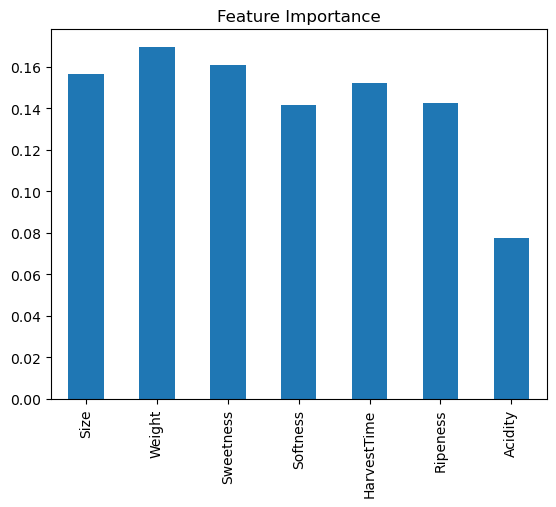

In [33]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);